In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Fire.xlsx')

In [3]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [12]:
df['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [13]:
df['FUEL'] = pd.Categorical(df['FUEL']).codes

In [18]:
y = df.pop('STATUS')
x = df

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=1)

In [79]:
from tensorflow.keras import Sequential
from keras import layers

model = Sequential()

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [80]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
349/349 [==============================] - 1s 1ms/step - loss: 0.1473 - accuracy: 0.6734 - val_loss: 0.1437 - val_accuracy: 0.5360
Epoch 2/10
349/349 [==============================] - 0s 887us/step - loss: 0.1333 - accuracy: 0.6596 - val_loss: 0.1335 - val_accuracy: 0.6879
Epoch 3/10
349/349 [==============================] - 0s 821us/step - loss: 0.1292 - accuracy: 0.6308 - val_loss: 0.1526 - val_accuracy: 0.5554
Epoch 4/10
349/349 [==============================] - 0s 779us/step - loss: 0.1233 - accuracy: 0.6376 - val_loss: 0.1239 - val_accuracy: 0.6747
Epoch 5/10
349/349 [==============================] - 0s 762us/step - loss: 0.1163 - accuracy: 0.7051 - val_loss: 0.1143 - val_accuracy: 0.6012
Epoch 6/10
349/349 [==============================] - 0s 788us/step - loss: 0.1051 - accuracy: 0.6723 - val_loss: 0.1082 - val_accuracy: 0.6732
Epoch 7/10
349/349 [==============================] - 0s 774us/step - loss: 0.1008 - accuracy: 0.6759 - val_loss: 0.1090 - val_accuracy: 0

(0.0, 1.0)

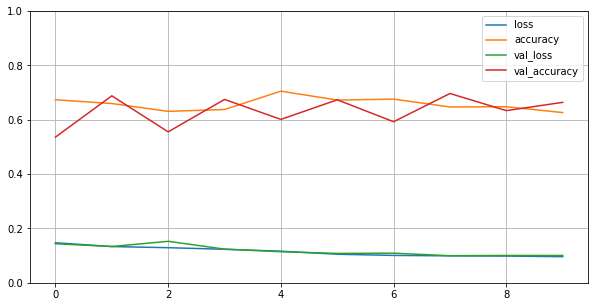

In [81]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)